# 19 December 2023 Presentation

In [1]:
import warnings
warnings.ignore_warnings = 1

In [2]:
%autosave 15

Autosaving every 15 seconds


In [3]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings will be ignored.")

Warnings will be ignored.


<center><h1>College Placement Prediction using Classification Techniques</h1></center>

#### Import the required library files.

In [4]:
# import math 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import *
from tkinter import ttk
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,r2_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

#### Importing the dataset with usage of pandas library. The dataset is kept in a DataFrame called as ' df '.

In [5]:
df = pd.read_csv("placementdata.csv")

#### The DataFrame's descriptive Statistics were found.

In [6]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


#### The initial 10 entries of the Data was checked.

In [7]:
df.head(10)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
5,6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced
6,7,7.7,1,1,1,76,4.0,No,No,62,65,NotPlaced
7,8,7.7,2,1,0,85,3.5,Yes,Yes,59,72,NotPlaced
8,9,6.5,1,1,0,84,3.9,No,Yes,75,71,NotPlaced
9,10,7.8,1,3,2,79,4.4,Yes,Yes,85,86,Placed


#### Column data type was found out and the discrete values were encoded in 0/1 encoding.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [9]:
for cols in df:
    print(f"The '{cols}' has unique values : {df[cols].nunique()}")

The 'StudentID' has unique values : 10000
The 'CGPA' has unique values : 27
The 'Internships' has unique values : 3
The 'Projects' has unique values : 4
The 'Workshops/Certifications' has unique values : 4
The 'AptitudeTestScore' has unique values : 31
The 'SoftSkillsRating' has unique values : 19
The 'ExtracurricularActivities' has unique values : 2
The 'PlacementTraining' has unique values : 2
The 'SSC_Marks' has unique values : 36
The 'HSC_Marks' has unique values : 32
The 'PlacementStatus' has unique values : 2


#### Binary attributes are kept in a 'binary_attributes' list

In [10]:
binary_attributes = []
for cols in df:
    if df[cols].nunique() == 2:
        binary_attributes.append(cols)

In [11]:
binary_attributes

['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

#### The Binary Attributes were encoded.

In [12]:
le = LabelEncoder()
for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])

#### A new DataFrame was created and normalised with decimal scaling.

In [13]:
new_df = df.copy()

In [14]:
new_df['CGPA'] = new_df['CGPA']/10
new_df['AptitudeTestScore'] = new_df['AptitudeTestScore']/100
new_df['SoftSkillsRating'] = new_df['SoftSkillsRating']/10
new_df['SSC_Marks'] = new_df['SSC_Marks']/100
new_df['HSC_Marks'] = new_df['HSC_Marks']/100

In [15]:
display(df.head(10))
display(new_df.head(10))

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1
5,6,7.0,0,2,2,71,4.2,1,0,55,66,0
6,7,7.7,1,1,1,76,4.0,0,0,62,65,0
7,8,7.7,2,1,0,85,3.5,1,1,59,72,0
8,9,6.5,1,1,0,84,3.9,0,1,75,71,0
9,10,7.8,1,3,2,79,4.4,1,1,85,86,1


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,0.75,1,1,1,0.65,0.44,0,0,0.61,0.79,0
1,2,0.89,0,3,2,0.90,0.40,1,1,0.78,0.82,1
2,3,0.73,1,2,2,0.82,0.48,1,0,0.79,0.80,0
3,4,0.75,1,1,2,0.85,0.44,1,1,0.81,0.80,1
4,5,0.83,1,2,2,0.86,0.45,1,1,0.74,0.88,1
5,6,0.70,0,2,2,0.71,0.42,1,0,0.55,0.66,0
6,7,0.77,1,1,1,0.76,0.40,0,0,0.62,0.65,0
7,8,0.77,2,1,0,0.85,0.35,1,1,0.59,0.72,0
8,9,0.65,1,1,0,0.84,0.39,0,1,0.75,0.71,0
9,10,0.78,1,3,2,0.79,0.44,1,1,0.85,0.86,1


### The DataFrame was distributed into X and Y DataFrames

In [16]:
X = df
X = X.drop("StudentID",axis = 1)
X = X.drop("PlacementStatus",axis = 1)

X_norm = new_df
X_norm = X_norm.drop("StudentID",axis = 1)
X_norm = X_norm.drop("PlacementStatus",axis = 1)

In [17]:
display(X.head())
display(X_norm.head())

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88


,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,0.75,1,1,1,0.65,0.44,0,0,0.61,0.79
1,0.89,0,3,2,0.90,0.40,1,1,0.78,0.82
2,0.73,1,2,2,0.82,0.48,1,0,0.79,0.80
3,0.75,1,1,2,0.85,0.44,1,1,0.81,0.80
4,0.83,1,2,2,0.86,0.45,1,1,0.74,0.88


In [18]:
Y = df["PlacementStatus"]

In [19]:
display(Y.head(10))

0    0
1    1
2    0
3    1
4    1
5    0
6    0
7    0
8    0
9    1
Name: PlacementStatus, dtype: int32

# Data Cleaning & Analysis

<Axes: >

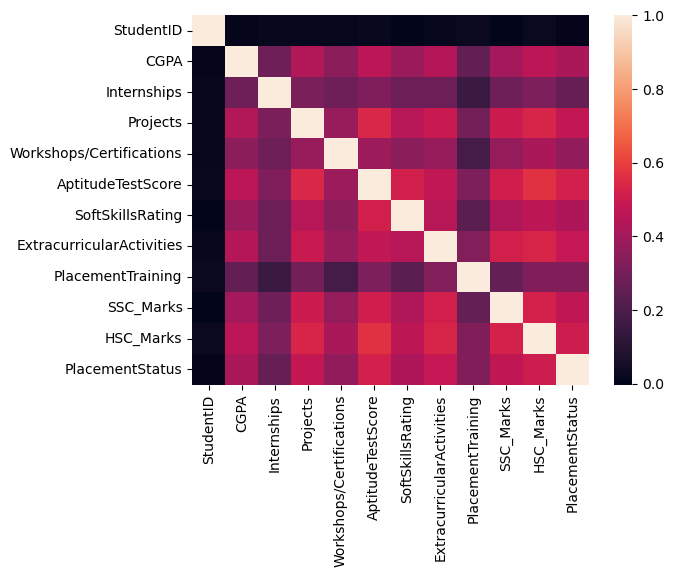

In [20]:
sns.heatmap(df.corr())

#### The above heatmap suggests that the atributes are fairly non-correlated. Hence we do not require to perform any feature selection.

## Checking for Missing Values

In [21]:
missing_values = df.isnull().sum()
print("Missing Values: \n\n", missing_values)

Missing Values: 

 StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


#### The above suggests that our dataset doesnot contain any missing values and hence we do no require to perform any missing value treatment.

## Checking for Duplicate Rows

In [22]:
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 Empty DataFrame
Columns: [StudentID, CGPA, Internships, Projects, Workshops/Certifications, AptitudeTestScore, SoftSkillsRating, ExtracurricularActivities, PlacementTraining, SSC_Marks, HSC_Marks, PlacementStatus]
Index: []


#### Again we can observe that the above dataframe contains no duplicate rows.

## Checking for Outliers

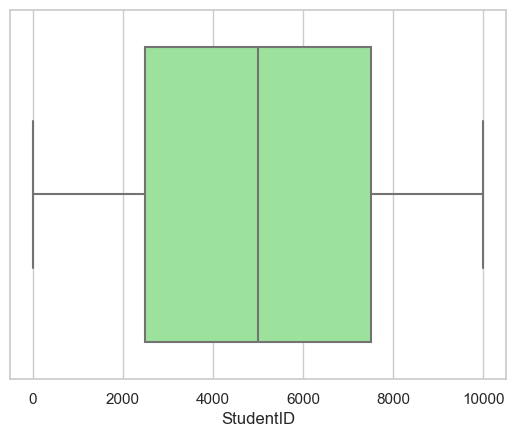

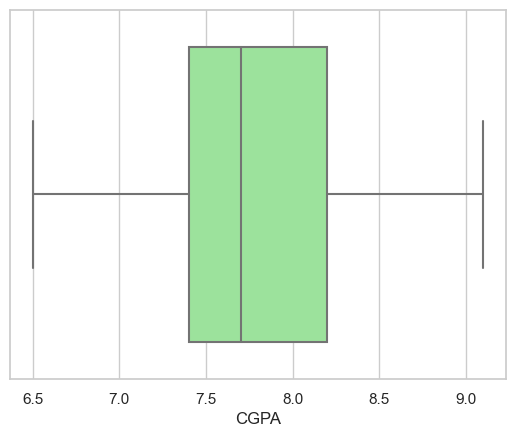

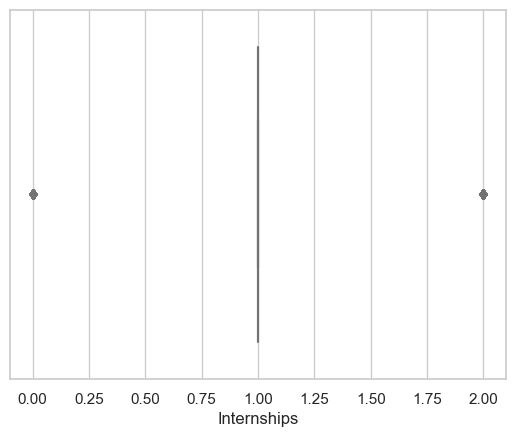

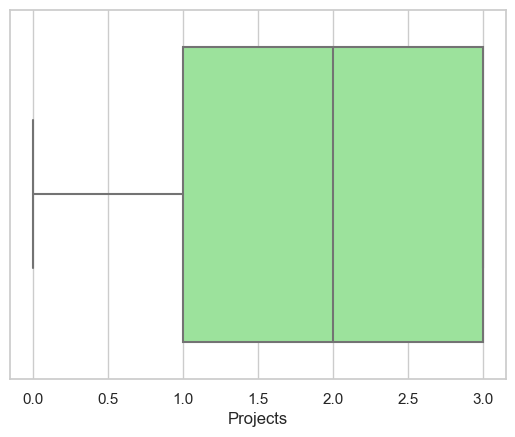

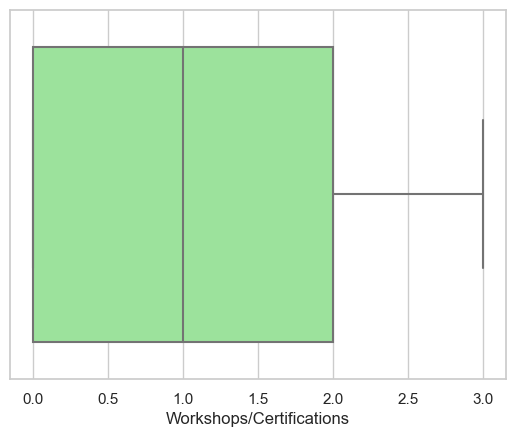

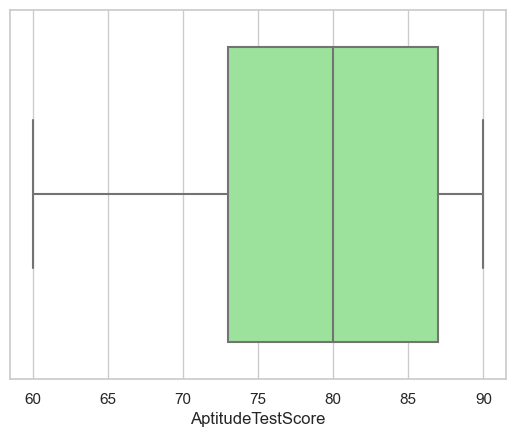

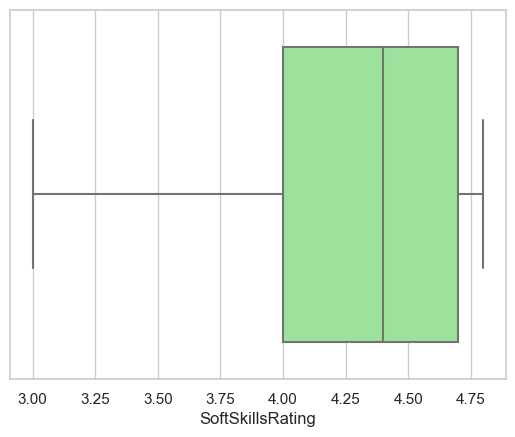

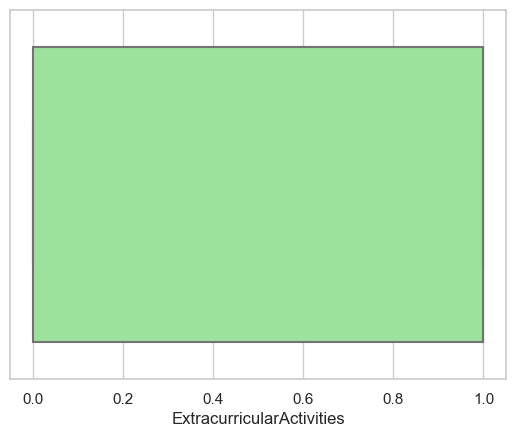

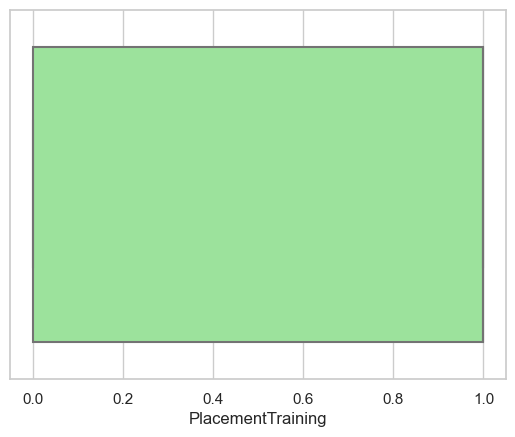

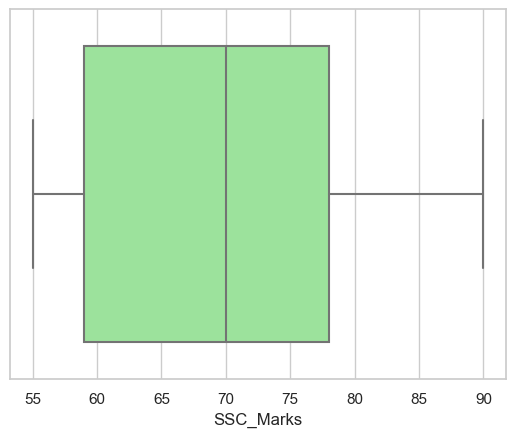

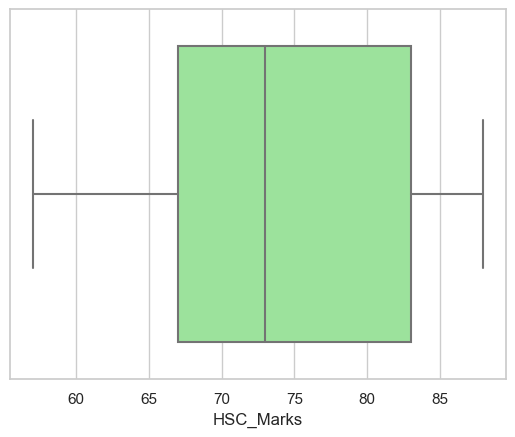

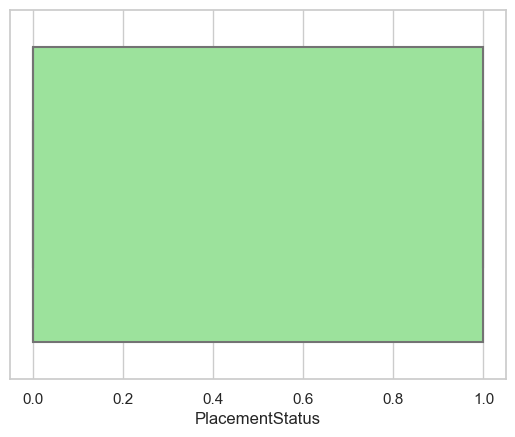

In [23]:
sns.set(style="whitegrid", palette="pastel")
for col in df:
    sns.boxplot(x=df[col],color = "lightgreen")
    plt.show()

#### The Box Plots are not showing any outliers in order to confirm this, we use Z-Score and IQR Method.

### Z-Score Outlier Detection

In [24]:
for col in df:
    z_scores = zscore(df[col])
    outliers = (z_scores > 3) | (z_scores < -3)

print(df[outliers])

Empty DataFrame
Columns: [StudentID, CGPA, Internships, Projects, Workshops/Certifications, AptitudeTestScore, SoftSkillsRating, ExtracurricularActivities, PlacementTraining, SSC_Marks, HSC_Marks, PlacementStatus]
Index: []


#### No outliers found using ZScore.

### IQR Outlier Detection

In [25]:
for col in df:    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)

print(df[outliers])

Empty DataFrame
Columns: [StudentID, CGPA, Internships, Projects, Workshops/Certifications, AptitudeTestScore, SoftSkillsRating, ExtracurricularActivities, PlacementTraining, SSC_Marks, HSC_Marks, PlacementStatus]
Index: []


#### No Outliers also found using IQR

## Now that our Data is Clean We use it to perform the Classification

### Train and Test Dataset was made and the data was splitted.

In [27]:
# This is the train and test split which was created from the normalised DataFrame.
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.30, random_state=45)

In [28]:
# # This is the train and test split which was created from the original normalised DataFrame.
# X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_norm, Y_norm, test_size=0.30, random_state=45)

# Logistic Regression Model Creation and Evaluation

### A Logistic Regression Model was created and its evaluation was done

In [29]:
# Here we are creating a Logistic Regression Object from the SK-Learn Library.
lr = LogisticRegressionCV(cv = 5,random_state = 45,n_jobs = -1)

In [30]:
lr.fit(X_train.values,y_train.values)

LogisticRegressionCV(cv=5, n_jobs=-1, random_state=45)

In [31]:
y_pred_lr = lr.predict(X_test.values)

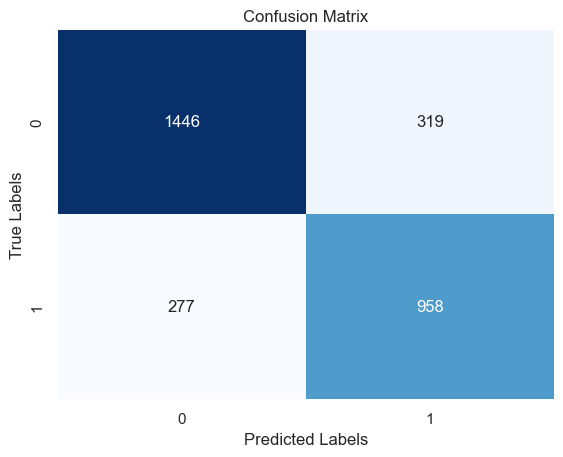

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [42]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep_lr}")

Accuracy: 0.8013333333333333
Confusion Matrix:
[[1446  319]
 [ 277  958]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1765
           1       0.75      0.78      0.76      1235

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



#### The Model Performance was found to be as above.

# MLP Classifier Model Creation and Evaluation

In [38]:
mlpclf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

In [40]:
mlpclf.fit(X_train.values,y_train.values)

MLPClassifier(max_iter=500, random_state=42)

In [41]:
y_pred_mlp = mlpclf.predict(X_test.values)

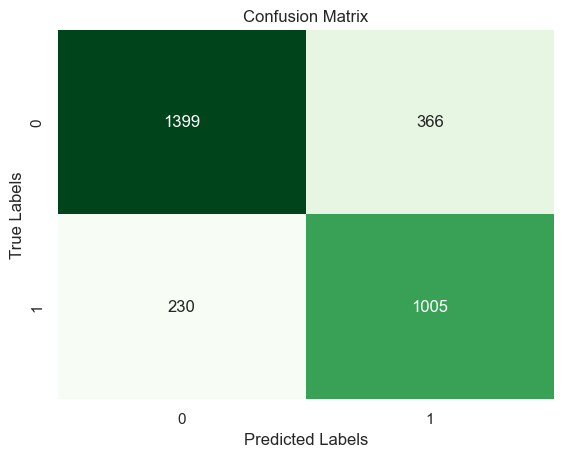

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [43]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

print(f"Accuracy: {accuracy_mlp}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8013333333333333
Confusion Matrix:
[[1399  366]
 [ 230 1005]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1765
           1       0.75      0.78      0.76      1235

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



#### The Model Performance was found to be as above.


# SVM Classifier Model Creation and Evaluation

In [45]:
svmclf = svm.SVC()
svmclf.fit(X_train.values, y_train.values)

SVC()

In [46]:
y_pred_svc = svmclf.predict(X_test.values)

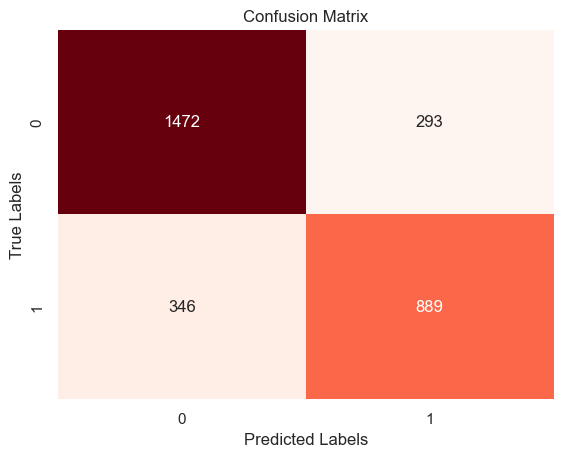

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [47]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
classification_rep_svc = classification_report(y_test, y_pred_svc)

print(f"Accuracy: {accuracy_svc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep_svc}")

Accuracy: 0.787
Confusion Matrix:
[[1472  293]
 [ 346  889]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1765
           1       0.75      0.72      0.74      1235

    accuracy                           0.79      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.79      0.79      0.79      3000



#### The Model Performance was found to be as above.


# Desicion Tree Classifier Model Creation and Evaluation

In [49]:
dectreeclf = DecisionTreeClassifier(random_state=42)

In [50]:
dectreeclf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred_dt = dectreeclf.predict(X_test.values)

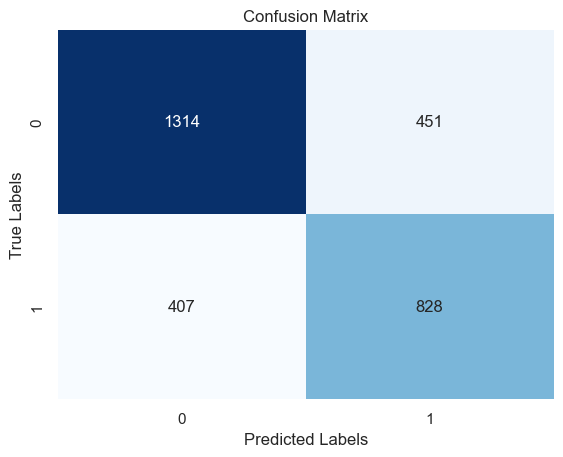

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [52]:
# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8013333333333333
Confusion Matrix:
[[1314  451]
 [ 407  828]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1765
           1       0.75      0.78      0.76      1235

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



#### The Model Performance was found to be as above.


# Naïve-Bayes Model Creation and Evaluation

In [55]:
nbclf = GaussianNB()

In [56]:
nbclf.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred_nb = nbclf.predict(X_test.values)

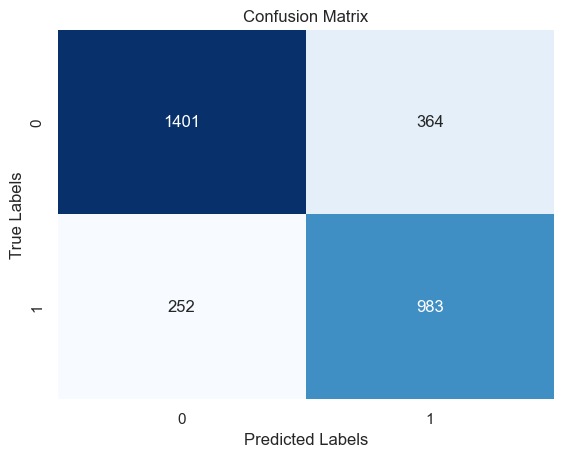

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [59]:
# Evaluate the performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8013333333333333
Confusion Matrix:
[[1401  364]
 [ 252  983]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1765
           1       0.75      0.78      0.76      1235

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



#### The Model Performance was found to be as above.



# Random Forest Classifier Model Creation and Evaluation

In [61]:
rfclf = RandomForestClassifier(n_estimators=100, random_state=42)

In [63]:
rfclf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
y_pred_rf = rfclf.predict(X_test.values)

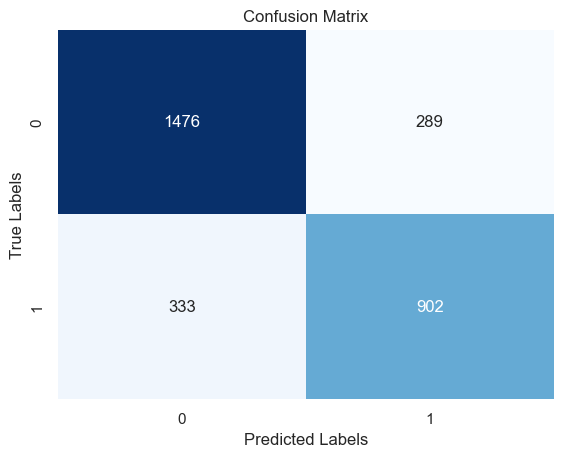

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [65]:
# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8013333333333333
Confusion Matrix:
[[1476  289]
 [ 333  902]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1765
           1       0.75      0.78      0.76      1235

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



#### The Model Performance was found to be as above.


## Above Model's Performance Comparision

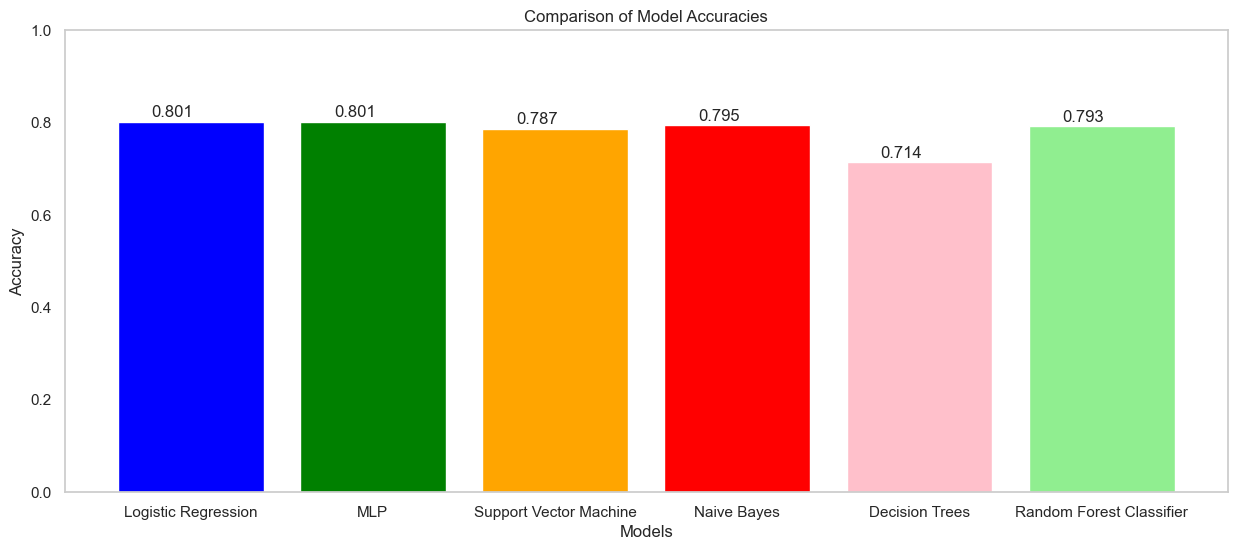

In [78]:
models = [
    'Logistic Regression',
    'MLP',
    'Support Vector Machine' ,
    'Naive Bayes',
    'Decision Trees' ,
    'Random Forest Classifier']

accuracies = [accuracy_lr, accuracy_mlp, accuracy_svc,accuracy_nb,accuracy_dt,accuracy_rf]

plt.figure(figsize=(15, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'pink', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.3f}', ha='center')
plt.grid(False)
plt.show()

## Predicting for a new datapoint

In [60]:
# new_datapoint = []
# print("For catagorical use 1 for true and 0 for false.")
# for features in X:
#     f = float(input(f"Enter for {features} : "))
#     new_datapoint.append(f)


# new_datapoint = np.array(new_datapoint)
# new_datapoint = new_datapoint.reshape(1, -1)
# if lr.predict(new_datapoint) == 0:
#     print("NOT PLACED!")
# else:
#     print("PLACED!")

In [73]:
values = []
def submit():
    values = [float(entry1.get()),float(entry2.get()),float(entry3.get()),float(entry4.get()),float(entry5.get())
             ,float(entry6.get()),float(entry7.get()),float(entry8.get()),float(entry9.get()),float(entry10.get())]
    
    new_datapoint = values
    new_datapoint = np.array(new_datapoint)
    new_datapoint = new_datapoint.reshape(1, -1)
    print(new_datapoint/10)
    
    temp = lr.predict(new_datapoint)
    print(temp)
    if temp == 0:
        result_label.config(text="Not Placed !")
    else:
        result_label.config(text=f"Placed !")

def clear():
    entry1.delete(0, tk.END)
    entry2.delete(0, tk.END)
    entry3.delete(0, tk.END)
    entry4.delete(0, tk.END)
    entry5.delete(0, tk.END)
    entry6.delete(0, tk.END)
    entry7.delete(0, tk.END)
    entry8.delete(0, tk.END)
    entry9.delete(0, tk.END)
    entry10.delete(0, tk.END)
    result_label.config(text="")

def exit_app():
    root.destroy()

root = tk.Tk()
root.geometry("300x450")
root.title("~~Placement Predictor~~")

# Labels
label1 = tk.Label(root, text="CGPA : ")
label2 = tk.Label(root, text="Internship Num : ")
label3 = tk.Label(root, text="Projects Num : ")
label4 = tk.Label(root, text="Workshops/Certifications : ")
label5 = tk.Label(root, text="AptitudeTestScore : ")
label6 = tk.Label(root, text="SoftSkillRating : ")
label7 = tk.Label(root, text="ExtraCurricular [0/1] : ")
label8 = tk.Label(root, text="Placement Training [0/1] : ")
label9 = tk.Label(root, text="SSC Marks : ")
label10 = tk.Label(root, text="HSC Marks : ")

# Entry Fields
entry1 = tk.Entry(root)
entry2 = tk.Entry(root)
entry3 = tk.Entry(root)
entry4 = tk.Entry(root)
entry5 = tk.Entry(root)
entry6 = tk.Entry(root)
entry7 = tk.Entry(root)
entry8 = tk.Entry(root)
entry9 = tk.Entry(root)
entry10 = tk.Entry(root)


# Arrange widgets using the grid layout manager
label1.grid(row=0, column=0, pady=5, sticky=tk.E)
entry1.grid(row=0, column=1, pady=5)
label2.grid(row=1, column=0, pady=5, sticky=tk.E)
entry2.grid(row=1, column=1, pady=5)
label3.grid(row=2, column=0, pady=5, sticky=tk.E)
entry3.grid(row=2, column=1, pady=5)
label4.grid(row=3, column=0, pady=5, sticky=tk.E)
entry4.grid(row=3, column=1, pady=5)
label5.grid(row=4, column=0, pady=5, sticky=tk.E)
entry5.grid(row=4, column=1, pady=5)
label6.grid(row=5, column=0, pady=5, sticky=tk.E)
entry6.grid(row=5, column=1, pady=5)
label7.grid(row=6, column=0, pady=5, sticky=tk.E)
entry7.grid(row=6, column=1, pady=5)
label8.grid(row=7, column=0, pady=5, sticky=tk.E)
entry8.grid(row=7, column=1, pady=5)
label9.grid(row=8, column=0, pady=5, sticky=tk.E)
entry9.grid(row=8, column=1, pady=5)
label10.grid(row=9, column=0, pady=5, sticky=tk.E)
entry10.grid(row=9, column=1, pady=5)


# Buttons
submit_button = tk.Button(root, text="Predict", command=submit)
clear_button = tk.Button(root, text="Clear", command=clear)
exit_button = tk.Button(root, text="Exit", command=exit_app)

# Result label
result_label = tk.Label(root, text="")

submit_button.grid(row=10, column=0, pady=10)
clear_button.grid(row=10, column=1, pady=10)
exit_button.grid(row=11, column=1, pady=10)

result_label.grid(row=15, column=0, columnspan=5)

# Start the Tkinter event loop
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\AnacondaJupyter\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Bishnu\AppData\Local\Temp\ipykernel_22616\4096504336.py", line 4, in submit
    ,float(entry6.get()),float(entry7.get()),float(entry8.get()),float(entry9.get()),float(entry10.get())]
ValueError: could not convert string to float: ''


[[3.120000e+01 4.120000e+01 4.310000e+01 4.151000e+02 3.513513e+05
  1.300000e+00 5.135000e+02 2.230000e+01 4.000000e-01 2.100000e+00]]
[1]


new_df['CGPA'] = new_df['CGPA']/10
new_df['AptitudeTestScore'] = new_df['AptitudeTestScore']/100
new_df['SoftSkillsRating'] = new_df['SoftSkillsRating']/10
new_df['SSC_Marks'] = new_df['SSC_Marks']/100
new_df['HSC_Marks'] = new_df['HSC_Marks']/100